<a href="https://colab.research.google.com/github/alulec/ProgramasTareasVarios/blob/main/TransformacionesElementales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Elementos que debe cumplir el programa
1.  Se debe definir como parámetro  de entrada el número de puntos a graficar en el polígono, ejemplo 3,4,5,6
2. Definir como se tomaran las puntos a graficar si están en orden o en desorden
3. En caso de estar en orden,  la figura se cerrara con el punto A - N, donde N es el valor de la última coordenada
4. En caso de estar desordenados, definir un criterio para ordenar y dibujar  el polígono
5. Preguntar el tipo de transformación que se va a realizar, si es una a la vez o varias. En ambos casos aplicar lo que corresponda, si son varias deben de cumplirse las propiedades de las transformaciones
6. Dar como resultado final la aplicación de la transformación y/o transformaciones


b) El programa puede hacerse en cualquier lenguaje de programación como C, C++ o Python


c) Se debe graficar el polígono inicial, así como sus transformaciones y el polígono final


d) El programa es en equipo de máximo 4 personas, el listado de los integrantes deberá enviarse en esta asignación en los comentarios el 22 de marzo para la programación de la revisión


Se evaluará lo siguiente:


1. Código
2. Que cumpla con los requerimientos solicitados 
3. Graficación del polígono
4. Preguntas sobre el código a los integrantes del equipo

In [17]:
# Lectura de los datos referentes a la figura
import numpy as np
import matplotlib.pyplot as plt

noPuntos = int(input("¿Cuantos puntos seran? R= "))
print("Opciones: 0 -> no, 1-> si")
orden =  int(input("¿Los puntos estaran en orden? R= "))
x = []
y = []

for i in range(noPuntos):
    x.append(float(input("Dame la x: ")))
    y.append(float(input("Dame la y: ")))


¿Cuantos puntos seran? R= 3
Opciones: 0 -> no, 1-> si
¿Los puntos estaran en orden? R= 1
Dame la x: 5
Dame la y: 11
Dame la x: 13
Dame la y: 3
Dame la x: 13
Dame la y: 19


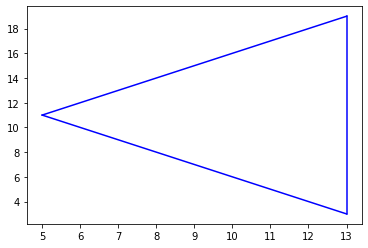

In [18]:
# Se grafica la figura inicial
#x = [-3, -5, -4, -3, -2, -1]
#y = [2, 4, 5, 4, 5, 4]
#noPuntos = 6
#orden = 1
if(orden == 1):
    for i in range(noPuntos -1):
        plt.plot([x[i], x[i+1]],[y[i], y[i+1]], "b-")
    plt.plot([x[0], x[noPuntos-1]], [y[0], y[noPuntos-1]], "b-")
    plt.show()
else:
    print()
    
    

In [19]:
# Se definen funciones para obtener las transformaciones

def obtenerRotacion():
    grado = round(float(input("¿Cuantos grados se rotara? R= ")), 4)
    pivoteX = round(float(input("Dame la x del pivote: ")), 4)
    pivoteY = round(float(input("Dame la y del pivote: ")), 4)

    grado = round((np.pi*grado)/180, 4)

    return [grado, pivoteX, pivoteY]

def obtenerEscalamiento():
    escX = round(float(input("Dame el decremetno/incremento de x: ")), 4)
    escY = round(float(input("Dame el decremetno/incremento de y: ")), 4)

    return [escX, escY]

def obtenerTraslacion():
    trasX = round(float(input("Dame el desplazamiento de x: ")), 4)
    trasY = round(float(input("Dame el desplazamiento de y: ")), 4)

    return [trasX, trasY]

In [20]:
# Se obtienen las transformaciones
listaRotaciones = []
escalamientoEnX = round(float(1), 4)
escalamientoEnY = round(float(1), 4)
trasladoEnX = round(float(0), 4)
trasladoEnY = round(float(0), 4)

noTransformaciones = int(input("¿Cuantas transformaciones se haran? R="))

print("0-> Rotar, 1-> Escalar, 2-> Trasladar")
for i in range(noTransformaciones):
    opcion = int(input("Tipo transformacion: "))
    
    if(opcion == 0):
        rot = obtenerRotacion()
        if (len(listaRotaciones)==0):
            listaRotaciones.append(rot)
        else:
            for i in range(len(listaRotaciones)):
                if(listaRotaciones[i][1]== rot[1] and listaRotaciones[i][2]== rot[2]):
                    listaRotaciones[i][0] += rot[0]
                else:
                    listaRotaciones.append(rot)
    elif(opcion == 1):
        aux = obtenerEscalamiento()
        escalamientoEnX *= round(float(aux[0]), 4)
        escalamientoEnY *= round(float(aux[1]), 4)
    elif(opcion == 2):
        temp = obtenerTraslacion()
        trasladoEnX += round(float(temp[0]), 4)
        trasladoEnY += round(float(temp[1]), 4)

¿Cuantas transformaciones se haran? R=4
0-> Rotar, 1-> Escalar, 2-> Trasladar
Tipo transformacion: 0
¿Cuantos grados se rotara? R= 33
Dame la x del pivote: 10
Dame la y del pivote: 11
Tipo transformacion: 1
Dame el decremetno/incremento de x: 0.25
Dame el decremetno/incremento de y: 0.25
Tipo transformacion: 0
¿Cuantos grados se rotara? R= 46
Dame la x del pivote: 10
Dame la y del pivote: 11
Tipo transformacion: 1
Dame el decremetno/incremento de x: 0.55
Dame el decremetno/incremento de y: 0.55


In [22]:
# Se aplican las transformaciones
# Reducción
#x = [5, 13, 13]
#y = [11, 3, 19]

# Rotar
for i in range(len(listaRotaciones)):
    rotar = listaRotaciones[i]
    for j in range(len(x)):
            e = round(rotar[1] + (x[j] - rotar[1])*np.cos(rotar[0]) - (y[j] - rotar[2])*np.sin(rotar[0]), 4)
            f = round(rotar[2] + (x[j] - rotar[1])*np.sin(rotar[0]) + (y[j] - rotar[2])*np.cos(rotar[0]), 4)

            x[j] = e
            y[j] = f

# Escalar
for i in range(len(x)):
    a = x[i]
    x[i] = round(float(a * escalamientoEnX), 4)
    b = y[i]
    y[i] = round(float(b * escalamientoEnY), 4)

# Traslado
for i in range(len(x)):
    c = x[i]
    x[i] = round(float(c + trasladoEnX), 4)
    d = y[i]
    y[i] = round(float(d + trasladoEnY), 4)
print(x)
print(y)

[9.0464, 18.4253, 2.719]
[6.0918, 12.4192, 15.4707]
[1.2439, 2.5335, 0.3739]
[0.8376, 1.7076, 2.1272]
[1.2439, 2.5335, 0.3739]
[0.8376, 1.7076, 2.1272]


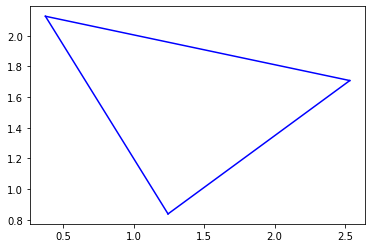

In [23]:
# Se grafica la figura con las transformaciones

if(orden == 1):
    for i in range(noPuntos -1):
        plt.plot([x[i], x[i+1]],[y[i], y[i+1]], "b-")
    plt.plot([x[0], x[noPuntos-1]], [y[0], y[noPuntos-1]], "b-")
    plt.show()
else:
    print()